In [22]:
import c3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:
file_path = '/body/subject_0510 Cal 02.c3d'
reader = c3d.Reader(open(file_path, 'rb'))

/home/xinyuan/anaconda3/envs/soma/lib/python3.7/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [24]:
total_frames = len(list(reader.read_frames()))
print(f'Total frames in the C3D file: {total_frames}')

Total frames in the C3D file: 2622


In [25]:
first_frame_data = next(reader.read_frames())

first_frame_number = first_frame_data[0]

print(f'The frame number of the first frame in the C3D file: {first_frame_number}')

The frame number of the first frame in the C3D file: 475


In [30]:
frame_index_to_visualize = 475 
for i, points, analog in reader.read_frames():
    if i == frame_index_to_visualize:
        marker_points = points
        break
        
print(marker_points.shape)

point_cloud_data = marker_points[:, :3]
print(point_cloud_data.shape)

[[-1.2854735e+03 -9.5663666e+02  8.9491895e+02  0.0000000e+00
   0.0000000e+00]
 [-1.0712677e+03 -8.2336731e+02  8.9336823e+02  0.0000000e+00
   0.0000000e+00]
 [-1.3858243e+03 -7.7919952e+02  8.8694678e+02  0.0000000e+00
   0.0000000e+00]
 [-1.1584832e+03 -6.7942938e+02  9.2996301e+02  0.0000000e+00
   0.0000000e+00]
 [-1.3895391e+03 -8.8680664e+02  1.1588942e+03  0.0000000e+00
   0.0000000e+00]
 [-1.1583314e+03 -7.7089331e+02  1.1393999e+03  0.0000000e+00
   0.0000000e+00]
 [-1.1853171e+03 -8.2234192e+02  4.6980310e+02  0.0000000e+00
   0.0000000e+00]
 [-1.1199723e+03 -9.3351624e+02  4.7490085e+02  0.0000000e+00
   0.0000000e+00]
 [-1.3078480e+03 -6.2643579e+02  4.9956680e+02  0.0000000e+00
   0.0000000e+00]
 [-1.2625403e+03 -7.5953796e+02  4.8531390e+02  0.0000000e+00
   0.0000000e+00]
 [-1.3942997e+03 -8.8478595e+02  1.2713524e+03  0.0000000e+00
   0.0000000e+00]
 [-1.1638108e+03 -7.6962140e+02  1.2761091e+03  0.0000000e+00
   0.0000000e+00]
 [-1.1323826e+03 -8.2812445e+02  1.63445

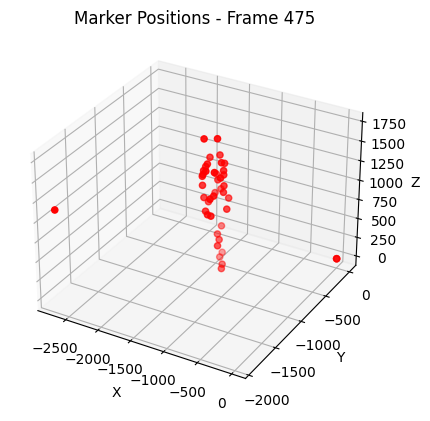

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(marker_points[:, 0], marker_points[:, 1], marker_points[:, 2], c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Marker Positions - Frame {frame_index_to_visualize}')

plt.show()

In [1]:
import smplx
import torch

model = smplx.create("/smplx_locked_head/neutral/model.npz",model_type="smplx")

betas = torch.randn([1, model.num_betas], dtype=torch.float32)
expression = torch.randn([1, model.num_expression_coeffs], dtype=torch.float32)
body_pose = torch.zeros([1, 21, 3], dtype=torch.float32)
output = model(betas=betas, expression=expression, body_pose=body_pose, return_verts=True)

vertices = output.vertices.detach().cpu().numpy().squeeze()
joints = output.joints.detach().cpu().numpy().squeeze()

ValueError: Unknown model type model.npz, exiting!

In [583]:
import open3d as o3d
import numpy as np

mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(vertices)
mesh.triangles = o3d.utility.Vector3iVector(model.faces)

# Set all vertices to red
red_color = [1.0, 0.0, 0.0]
mesh.vertex_colors = o3d.utility.Vector3dVector(np.tile(red_color, (len(vertices), 1)))

# Set the second vertex to black
# female
# black_color = [0.0, 0.0, 0.0]
# mesh.vertex_colors[6019] = black_color # right_elbow1
# mesh.vertex_colors[5990] = black_color # right_collar1
# mesh.vertex_colors[5920] = black_color # neck2
# mesh.vertex_colors[5940] = black_color # spine31
# mesh.vertex_colors[5949] = black_color # pelvis1
# mesh.vertex_colors[6099] = black_color # right_collar2
# mesh.vertex_colors[4280] = black_color # spine12
# mesh.vertex_colors[6143] = black_color # spine22
# mesh.vertex_colors[6244] = black_color # right_hip2
# mesh.vertex_colors[6266] = black_color # right_hip1
# mesh.vertex_colors[2176] = black_color # head1
# mesh.vertex_colors[3753] = black_color # left_ankle1
# mesh.vertex_colors[3505] = black_color # left_hip1
# mesh.vertex_colors[5651] = black_color # neck1
# mesh.vertex_colors[5652] = black_color # spine11
# mesh.vertex_colors[6634] = black_color # pelvis2
# mesh.vertex_colors[5416] = black_color # spine32
# mesh.vertex_colors[6999] = black_color # right_elbow2
# mesh.vertex_colors[7250] = black_color # right_shoulder1
# mesh.vertex_colors[7300] = black_color # right_wrist1
# mesh.vertex_colors[8298] = black_color # right_shoulder2
# mesh.vertex_colors[8429] = black_color # right_ankle2
# mesh.vertex_colors[8439] = black_color # right_ankle1
# mesh.vertex_colors[4253] = black_color # left_elbow2
# mesh.vertex_colors[4300] = black_color # left_elbow1
# mesh.vertex_colors[4430] = black_color # left_collar2
# mesh.vertex_colors[4470] = black_color # left_shoulder2
# mesh.vertex_colors[4460] = black_color # left_shoulder1
# mesh.vertex_colors[4540] = black_color # left_wrist1
# mesh.vertex_colors[4550] = black_color # left_wrist2
# mesh.vertex_colors[5655] = black_color # spine21
# mesh.vertex_colors[5735] = black_color # left_ankle2
# mesh.vertex_colors[6441] = black_color # right_knee2
# mesh.vertex_colors[6437] = black_color # right_knee1
# mesh.vertex_colors[2037] = black_color # head2
# mesh.vertex_colors[3530] = black_color # left_hip2
# mesh.vertex_colors[3631] = black_color # left_knee2
# mesh.vertex_colors[3649] = black_color # left_knee1
# mesh.vertex_colors[7323] = black_color # right_wrist2
# mesh.vertex_colors[5435] = black_color # left_collar1

# neutral


# Visualize both the meshes
o3d.visualization.draw_geometries([mesh])
o3d.io.write_triangle_mesh("/media/xinyuan/KK-LUZ/output_mesh.ply", mesh)

True

(10475, 3)
(127, 3)


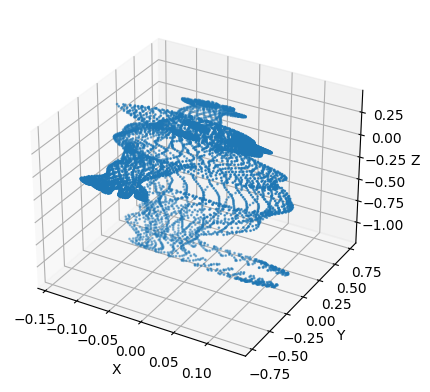

In [48]:
print(vertices.shape)
print(joints.shape)
points = vertices

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 2], points[:, 0], points[:, 1], s=1)

ax.scatter(points[2000, 2], points[2000, 0], points[2000, 1], s=1, c='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()